# Projeto 3 - Gabriel Moreira e Matheus Campbell

## Introdução

O projeto 3 de Ciência dos Dados tem como objetivos estudar métodos de comparação de variáveis, tendo em foco a regressão múltipla e simples basicamente. Tais regressões se diferenciam apenas no fato da regressão múltipla trabalharmos com mais de duas variáveis, enquanto na regressão simples trabalha-se apenas analisando duas variáveis, sendo elas a variável resposta e a variável explicativa. 
Ele foi dividido em três partes principais: a primeira consiste na escolha das variáveis para a análise posteriormente; a segunda, no entanto é uma parte mais teórica, na qual estudamos mais afundo tanto a regressão múltipla quanto a simples; a terceira parte é a análise das variáveis usando o Python, com gráficos e conclusões mostrados posteriormente nesse documento.


## Escolha das variáveis

#### Escolhemos as variáveis: Taxa de Fertilidade (variável resposta), Taxa de conclusão do ensino primário (variável explicativa) e  o IDH (variável explicativa)


A taxa de fertilidade (Children per Woman) é a estimativa do número
médio de filhos que as mulheres de uma determinada região tem durante o
período reprodutivo. Escolhemos essa variável resposta pois ela se relaciona
com diferentes características de diferentes países. Dentre tais
características, escolhemos o IDH (Índice de Desenvolvimento Humano) e a
taxa de crianças que completam o ensino primário. De que forma a taxa de
fertilidade impacta o IDH de alguma nação e sua taxa de conclusão do
ensino primário? Através do estudo dessas variáveis, é possível
respondermos à essa pergunta e tirarmos algumas conclusões
definitivamente importantes.


## PERGUNTA: Uma taxa maior de fertilidade é prejudicial ao ensino e ao IDH?

#### Imports

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
from matplotlib.ticker import LinearLocator

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/moreira/Desktop/Gabriel/Insper/2°Semestre/Ciência dos Dados/Projeto_3


In [2]:
dados = pd.read_excel('excel p3.xlsx',index_col=0)
dados.head()

,Filhos,IDH,Taxa
Países,,,
Afghanistan,6.46,0.363,NaN
Albania,1.80,0.729,NaN
Algeria,2.66,0.680,96.39509
Angola,6.52,0.471,NaN
Antigua and Barbuda,2.18,NaN,NaN


In [3]:
dados.shape

(201, 3)

In [4]:
#Retirar NaN
dados=dados[~np.isnan(dados.Filhos)]
dados=dados[~np.isnan(dados.IDH)]
dados=dados[~np.isnan(dados.Taxa)]
dados.shape

(121, 3)

In [5]:
dados.head()

,Filhos,IDH,Taxa
Países,,,
Algeria,2.66,0.680,96.39509
Argentina,2.25,0.780,102.61247
Armenia,1.40,0.715,101.31553
Austria,1.38,0.870,103.44956
Bahamas,1.88,0.770,102.36646


### Média e desvio padrão da Taxa de Fertilidade

In [39]:
#Média e Desvio Padrão de filhos
print('Média:',dados.Filhos.mean())
print('Desvio Padrão:',dados.Filhos.var()**1/2)

Média: 2.9469421487603302
Desvio Padrão: 1.2332765358126714


### Média e desvio padrão do IDH

In [40]:
#Média e Desvio Padrão IDH
print('Média:',dados.IDH.mean())
print('Desvio Padrão:',dados.IDH.var()**1/2)

Média: 0.6537438016528927
Desvio Padrão: 0.015070287741046828


### Média e desvio padrão da Taxa de conclusão do ensino primário

In [41]:
#Média e Desvio Padrão Taxa
print('Média:',dados.Taxa.mean())
print('Desvio Padrão:',dados.Taxa.var()**1/2)

Média: 88.42825008264462
Desvio Padrão: 174.22747429530708


### Comparando as variáveis explicativas com a variável resposta

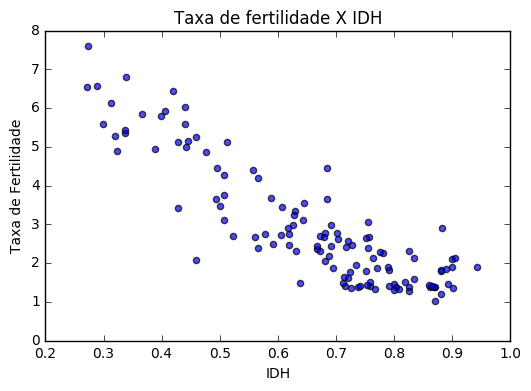

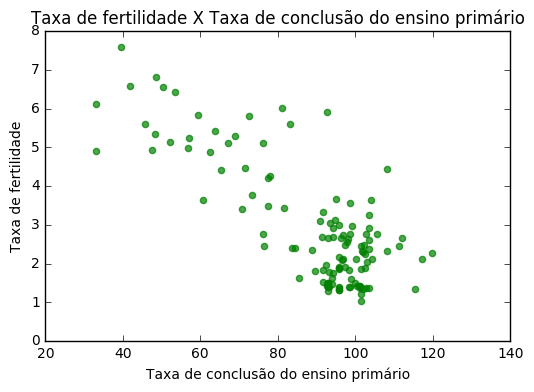

In [27]:
## TAXA DE FERTILIDADE x IDH
plt.scatter(dados.IDH, dados.Filhos, alpha=0.7)  # Plot the raw data
plt.title('Taxa de fertilidade X IDH')
plt.xlabel('IDH')
plt.ylabel('Taxa de Fertilidade')
plt.show()

## TAXA DE FERTILIDADE x TAXA DE CONCLUSÃO DO ENSINO PRIMÁRIO
plt.scatter(dados.Taxa, dados.Filhos, alpha=0.7, color='green')  # Plot the raw data
plt.title('Taxa de fertilidade X Taxa de conclusão do ensino primário')
plt.xlabel("Taxa de conclusão do ensino primário")
plt.ylabel("Taxa de fertilidade")



### Análise das correlações entre as variáveis

In [10]:
dados.corr(method='pearson')


,Filhos,IDH,Taxa
Filhos,1.000000,-0.882779,-0.789805
IDH,-0.882779,1.000000,0.805107
Taxa,-0.789805,0.805107,1.000000


Nota-se valores altos de correlação entre as variáveis escolhidas, sabendo que quando mais próximo de 1 (valor máximo de correlação) maior a associação entre as duas variáveis analisadas.

### Gráfico 3D das variáveis

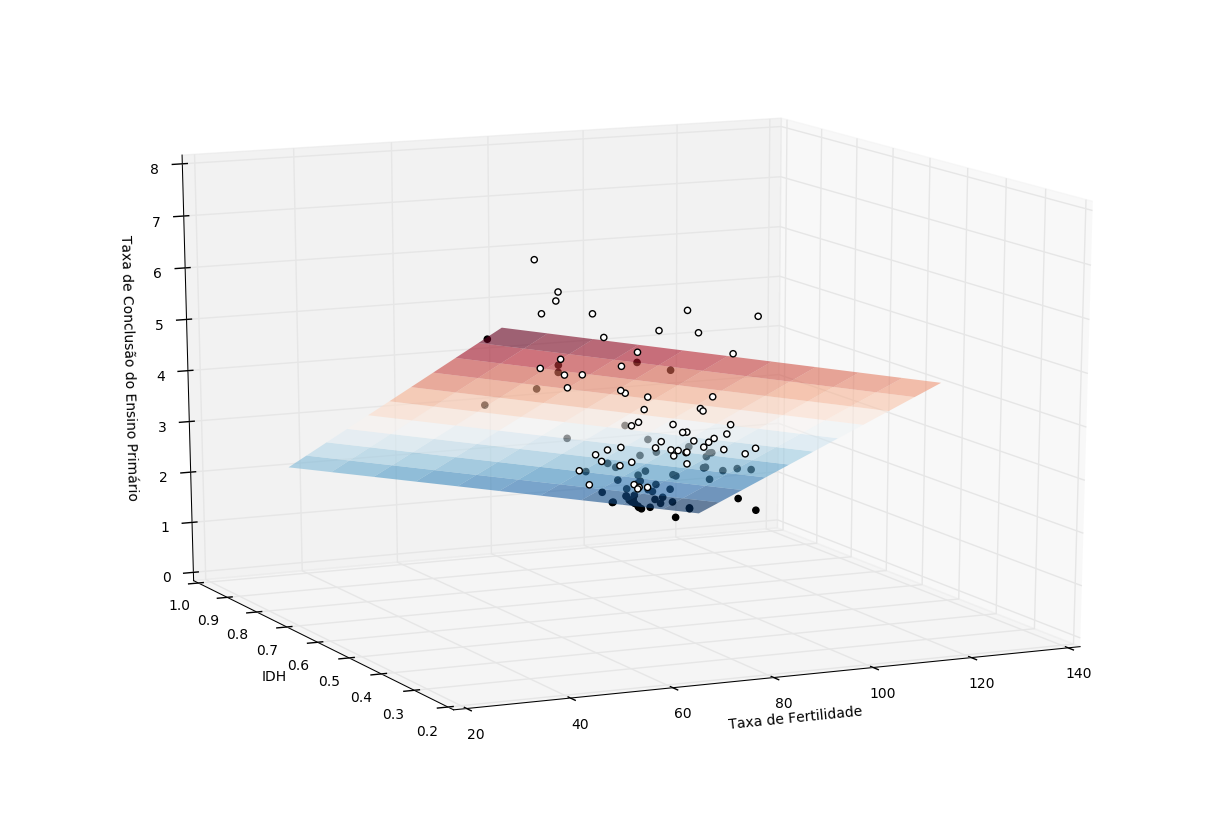

In [11]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'IDH']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Taxa, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Taxa, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Taxa de Fertilidade')
ax.set_ylabel('IDH')
ax.set_zlabel('Taxa de Conclusão do Ensino Primário')

### Cálculo da regressão linear entre as variáveis (explicativa x resposta)

In [12]:
#SS IDH
listaIDH = []
for i in range (len(dados.IDH)):
    list_IDH = (dados.IDH[i]-dados.IDH.mean())**2
    listaIDH.append(list_IDH)

somaIDH =0
for i in range (len(listaIDH)):
    somaIDH+=listaIDH[i]
somaIDH

3.6168690578512388

In [13]:
#SS Filhos
listaFilhos = []
for i in range (len(dados.Filhos)):
    list_Filhos = (dados.Filhos[i]-dados.Filhos.mean())**2
    listaFilhos.append(list_Filhos)

somaFilhos =0
for i in range (len(listaFilhos)):
    somaFilhos+=listaFilhos[i]
somaFilhos

295.98636859504114

In [14]:
#SS Taxa
listaTaxa = []
for i in range (len(dados.Taxa)):
    list_Taxa = (dados.Taxa[i]-dados.Taxa.mean())**2
    listaTaxa.append(list_Taxa)

somaTaxa =0
for i in range (len(listaTaxa)):
    somaTaxa+=listaTaxa[i]
somaTaxa

41814.593830873695

In [15]:
# SSYX Filhos IDH
listaIDH_Filhos = []
for i in range (len(dados.Filhos)):
    list_IDH_Filhos = (dados.Filhos[i]-dados.Filhos.mean())*(dados.IDH[i]-dados.IDH.mean())
    listaIDH_Filhos.append(list_IDH_Filhos)

somaIDH_Filhos =0
for i in range (len(listaIDH_Filhos)):
    somaIDH_Filhos+=listaIDH_Filhos[i]
somaIDH_Filhos



-28.883804793388425

In [16]:
# SSYX Filhos Taxa
listaTaxa = []
for i in range (len(dados.Filhos)):
    list_Taxa = (dados.Filhos[i]-dados.Filhos.mean())*(dados.Taxa[i]-dados.Taxa.mean())
    listaTaxa.append(list_Taxa)

somaTaxa_Filhos =0
for i in range (len(listaTaxa)):
    somaTaxa_Filhos+=listaTaxa[i]
somaTaxa_Filhos


-2778.5597967694207

In [17]:
# Beta1 Filhos e IDH
Beta1_FI = somaIDH_Filhos/somaIDH
Beta1_FI

-7.9858585786205181

In [18]:
#Beta0 Filhos e IDH
dados.Filhos.mean() - Beta1_FI*dados.IDH.mean()


8.167647695410075

### Gráfico da linha obtida através da regressão linear com os dados reais (Taxa de Fertilidade x IDH)

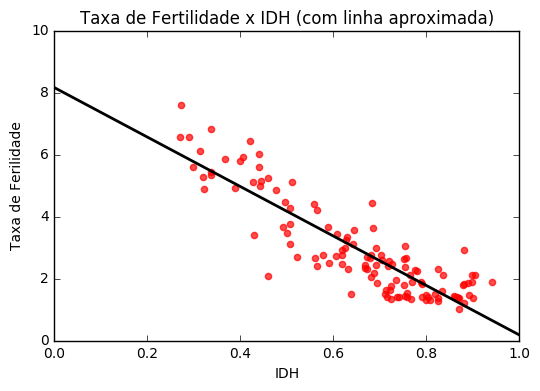

In [38]:
lista_x = []
lista_y = np.arange(0,1,0.001)
for i in range (len(lista_y)):
    x = lista_y[i]*(-7.98)+8.16
    lista_x.append(x)
lines = plt.plot(lista_y,lista_x)
plt.title('Taxa de Fertilidade x IDH (com linha aproximada)')
plt.xlabel('IDH')
plt.ylabel('Taxa de Ferilidade')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,10])
plt.setp(lines, 'color', 'black', 'linewidth', 2.0)
plt.scatter(dados.IDH, dados.Filhos, alpha=0.7, color='red')  # Plot the raw data
plt.show()


In [20]:
# Beta1 Filhos e IDH
Beta1_FT = somaTaxa_Filhos/somaTaxa
Beta1_FT

-0.066449522575964343

In [21]:
#Beta0 Filhos e IDH
dados.Filhos.mean() - Beta1_FT*dados.Taxa.mean()


8.8229571489800449

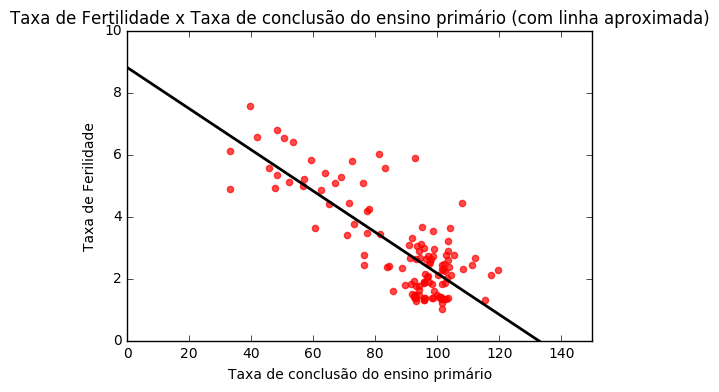

In [36]:
lista_y = []
lista_x = np.arange(0,140,0.01)
for i in range (len(lista_x)):
    y = lista_x[i]*(-0.0664)+8.82
    lista_y.append(y)
plt.title('Taxa de Fertilidade x Taxa de conclusão do ensino primário (com linha aproximada)')
plt.xlabel('Taxa de conclusão do ensino primário')
plt.ylabel('Taxa de Ferilidade')
lines = plt.plot(lista_x,lista_y)
axes = plt.gca()
axes.set_xlim([0,150])
axes.set_ylim([0,10])
plt.setp(lines, 'color', 'black', 'linewidth', 2.0)
plt.scatter(dados.Taxa, dados.Filhos, alpha=0.7, color='red')  # Plot the raw data
plt.show()


### Regressão Linear Múltipla

In [23]:
#Regressão Linear Multipla 

# Dados
y=dados.Filhos
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Filhos   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     231.7
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           1.36e-41
Time:                        22:53:52   Log-Likelihood:                -129.32
No. Observations:                 121   AIC:                             264.6
Df Residuals:                     118   BIC:                             273.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.7697      0.315     27.812      0.000         8.145     9.394
IDH           -6.3488      0.632    -10.038      0.000        -7.601    -5.096
Taxa          -0.0189      0.006     -3.215      0.002        -0.031    -0.007
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.300
Skew:                           0.248   Prob(JB):                        0.522
Kurtosis:                       3.113   Cond. No.                         881.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O coeficiente de determinação R pode ser explicado como a razão da variação explicada pelo modelo pela variação total real, ou seja, 79,7% das variações reais podem ser explicadas pelo modelo proposto. Percebemos também que  a relação da Taxa de Fertilidade com ambas variáveis explicativas são negativas, uma vez que seus coeficientes mostrados acima (-6,3488 e -0,0189) são menores que zero. Ou seja, quando maior a Taxa de fertilidade, menor será o IDH e a Taxa de conclusão do ensino primário 


### Subgrupos

#### Divisão: Países com IDH elevado (de 0,700 a 0,799) e Países com baixo IDH (menos que 0,555)

In [42]:
div_1 = 0.700
div_2 = 0.555